In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("investor_data.csv")

data.head(3)

,investor,commit,deal_size,invite,rating,int_rate,covenants,total_fees,fee_share,prior_tier,invite_tier
0,Goldman Sachs,Commit,300,40,2,Market,2,30,0.0,Participant,Bookrunner
1,Deutsche Bank,Decline,1200,140,2,Market,2,115,20.1,Bookrunner,Participant
2,Bank of America,Commit,900,130,3,Market,2,98,24.4,Bookrunner,Bookrunner


inital hypothesis: commit is positively correlated with invite, int_rate, fee_share, total_fees. Negatively correlated with rating and covenant number. Lower rating number means better credit rating and lower covenant number means less restrictions on loan

prior_tier to invite_tier: invite bookrunner more likely to commit, bookruner to participant less likely to commit, participant to participant no impact


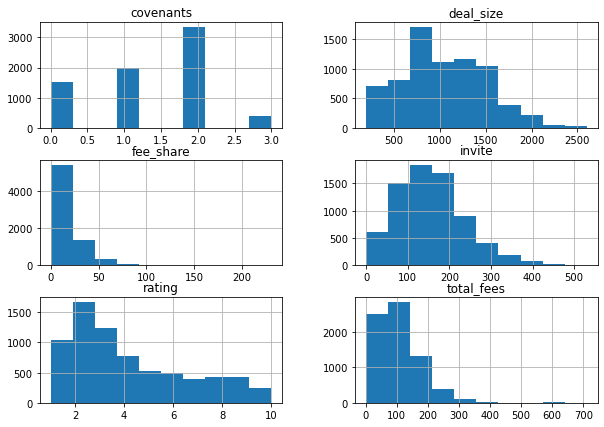

In [3]:
inv_data = data[data.total_fees > 0]
inv_data.hist(figsize=(10,7))
plt.show()

Explore data and get an idea of what it represents so that you have an idea of what outputs are reasonable at end

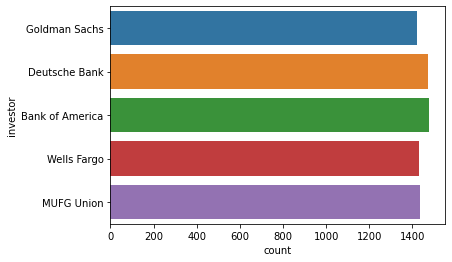

In [4]:
sns.countplot(y='investor', data=inv_data)

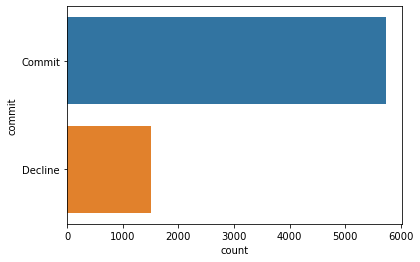

In [5]:
sns.countplot(y='commit', data=inv_data)

In [6]:
inv_data.groupby("investor").commit.value_counts()

investor         commit 
Bank of America  Commit     1247
                 Decline     231
Deutsche Bank    Commit      940
                 Decline     531
Goldman Sachs    Commit     1064
                 Decline     356
MUFG Union       Commit     1207
                 Decline     226
Wells Fargo      Commit     1272
                 Decline     159
Name: commit, dtype: int64

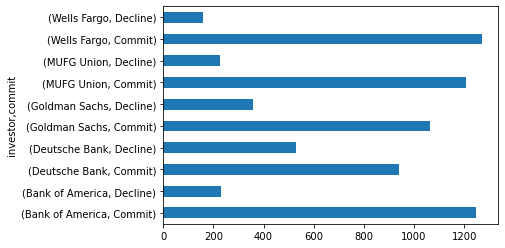

In [7]:
inv_data.groupby("investor").commit.value_counts().plot(kind='barh')

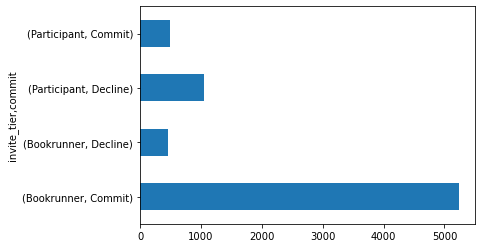

In [8]:
inv_data.groupby('invite_tier').commit.value_counts().plot(kind='barh')

In [9]:
inv_data['tier_change']=np.where(inv_data.prior_tier==inv_data.invite_tier, "None", 
                                 np.where(inv_data.prior_tier=="Participant", "Promoted", "Demoted"))
inv_data.head(3)

C:\Users\chiugabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,investor,commit,deal_size,invite,rating,int_rate,covenants,total_fees,fee_share,prior_tier,invite_tier,tier_change
0,Goldman Sachs,Commit,300,40,2,Market,2,30,0.0,Participant,Bookrunner,Promoted
1,Deutsche Bank,Decline,1200,140,2,Market,2,115,20.1,Bookrunner,Participant,Demoted
2,Bank of America,Commit,900,130,3,Market,2,98,24.4,Bookrunner,Bookrunner,None


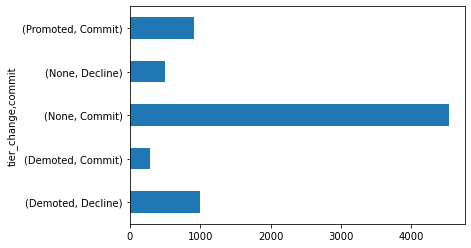

In [10]:
inv_data.groupby("tier_change").commit.value_counts().plot(kind='barh')
plt.show()

The above histogram demonstrates that a demotion from bookrunner to participant is likely to lead to an increased probability of declining to commit to the deal. In fact, a demotion is substantially more likely to lead to a decline outcome rather than a commit outcome
As well, the data shows that the bank has always committed to a deal if there's a promotion from participant to bookrunner.

In [12]:
inv_data[inv_data.tier_change=="None"].groupby('prior_tier').commit.value_counts()

prior_tier   commit 
Bookrunner   Commit     4322
             Decline     461
Participant  Commit      206
             Decline      43
Name: commit, dtype: int64

In [14]:
inv_data[inv_data.investor=="Goldman Sachs"].groupby("commit").median()

,deal_size,invite,rating,covenants,total_fees,fee_share
commit,,,,,,
Commit,1100.0,170.0,3.0,1.5,107.0,14.35
Decline,900.0,100.0,3.0,2.0,68.0,5.65


In [21]:
inv_data['fee_percent'] = inv_data.apply(lambda inv_data: inv_data.fee_share/inv_data.total_fees, axis=1)
inv_data['invite_percent'] = inv_data.apply(lambda inv_data: inv_data.invite/inv_data.deal_size, axis=1)

C:\Users\chiugabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\chiugabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


             investor   commit  deal_size  invite  rating int_rate  covenants  \
0       Goldman Sachs   Commit        300      40       2   Market          2   
1       Deutsche Bank  Decline       1200     140       2   Market          2   
2     Bank of America   Commit        900     130       3   Market          2   
3         Wells Fargo   Commit       1200     210       2   Market          2   
4         Wells Fargo   Commit        900      90       3   Market          3   
...               ...      ...        ...     ...     ...      ...        ...   
7284    Goldman Sachs   Commit       1000     140      10   Market          1   
7285    Deutsche Bank  Decline        300      20       3    Below          2   
7286  Bank of America   Commit        800     130       1   Market          2   
7287    Goldman Sachs  Decline       1700     110       5    Above          1   
7288  Bank of America  Decline       1200     140       2   Market          1   

      total_fees  fee_share

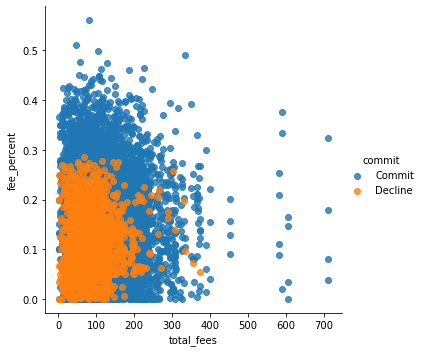

In [26]:
sns.lmplot(x="total_fees", y="fee_percent", hue="commit", data=inv_data, fit_reg=False)
plt.show()

It seems that above 30%, the bank will always commit and above 200 million the bank will generally commit

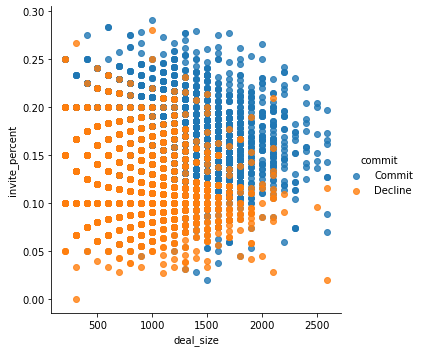

In [27]:
sns.lmplot(x="deal_size", y="invite_percent", hue="commit", data=inv_data, fit_reg=False)
plt.show()

Graph suggests an inverse relationship with invite_percent and deal_size. For very large deal sizes banks will accept being invited to contribute to a smaller percentage of the overall deal size. The bottom left shows that for small deal sizes, banks will decline to commit to the deal if they don't contribute to a meaningful percentage of the overall deal